<a href="https://colab.research.google.com/github/itsrita/analise-calculo-renal/blob/main/Analise_de_calculo_renal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Instalando o PySpark para a análise
!pip install pyspark

In [42]:
# configurando e iniciando uma sessão Spark em modo local
from pyspark.sql import SparkSession
sc = SparkSession.builder.master('local[*]').getOrCreate()

In [43]:
# Importando classes da biblioteca 'pyspark.ml' para construir, treinar e avaliar modelos de classificação e regressão
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [44]:
# Montando o Google Drive em um ambiente do Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Lendo o arquivo CSV e armazenando os dados em um DataFrame do Spark
dados_spark = sc.read.csv("/content/drive/MyDrive/Colab Notebooks/calculo_renal.csv", header=True)
type(dados_spark)

pyspark.sql.dataframe.DataFrame

In [46]:
# Exibindo as 10 primeiras linhas do DataFrame
dados_spark.show(10)

+---+---------+----+----+----+-----+------+-----+
| id|gravidade|  ph|osmo|cond|ureia|calcio|saida|
+---+---------+----+----+----+-----+------+-----+
|  0|    1.013|6.19| 443|14.8|  124|  1.45|    0|
|  1|    1.025| 5.4| 703|23.6|  394|  4.18|    0|
|  2|    1.009|6.13| 371|24.5|  159|  9.04|    0|
|  3|    1.021|4.91| 442|20.8|  398|  6.63|    1|
|  4|    1.021|5.53| 874|17.8|  385|  2.21|    1|
|  5|    1.025| 6.9| 947|28.4|  395|  2.64|    1|
|  6|    1.008|5.09| 371|15.5|  159|  2.17|    1|
|  7|    1.015|5.53| 450| 8.1|  170|  1.16|    0|
|  8|    1.025|7.38| 736|25.3|  418|  1.52|    0|
|  9|    1.017|6.61| 527|20.0|   75|  4.49|    1|
+---+---------+----+----+----+-----+------+-----+
only showing top 10 rows



In [47]:
# Exibindo a estrutura das colunas e seus tipos de dados do DataFrame
dados_spark.printSchema()

root
 |-- id: string (nullable = true)
 |-- gravidade: string (nullable = true)
 |-- ph: string (nullable = true)
 |-- osmo: string (nullable = true)
 |-- cond: string (nullable = true)
 |-- ureia: string (nullable = true)
 |-- calcio: string (nullable = true)
 |-- saida: string (nullable = true)



In [48]:
# Exibindo as colunas que serão utilizadas na análise do DataFrame
dados_selecionados = dados_spark.select("id","gravidade","ph","osmo","cond","ureia","calcio","saida").show(10)

+---+---------+----+----+----+-----+------+-----+
| id|gravidade|  ph|osmo|cond|ureia|calcio|saida|
+---+---------+----+----+----+-----+------+-----+
|  0|    1.013|6.19| 443|14.8|  124|  1.45|    0|
|  1|    1.025| 5.4| 703|23.6|  394|  4.18|    0|
|  2|    1.009|6.13| 371|24.5|  159|  9.04|    0|
|  3|    1.021|4.91| 442|20.8|  398|  6.63|    1|
|  4|    1.021|5.53| 874|17.8|  385|  2.21|    1|
|  5|    1.025| 6.9| 947|28.4|  395|  2.64|    1|
|  6|    1.008|5.09| 371|15.5|  159|  2.17|    1|
|  7|    1.015|5.53| 450| 8.1|  170|  1.16|    0|
|  8|    1.025|7.38| 736|25.3|  418|  1.52|    0|
|  9|    1.017|6.61| 527|20.0|   75|  4.49|    1|
+---+---------+----+----+----+-----+------+-----+
only showing top 10 rows



In [49]:
# Resumindo estatísticas descritivas do conjunto de dados para a coluna "id"
dados_spark.describe("id").show(5)

+-------+-----------------+
|summary|               id|
+-------+-----------------+
|  count|              414|
|   mean|            206.5|
| stddev|119.6557562342907|
|    min|                0|
|    max|               99|
+-------+-----------------+



In [50]:
# Filtrando os valores da coluna 'gravidade'
dados_spark.select("gravidade").distinct().show()

+---------+
|gravidade|
+---------+
|    1.021|
|    1.012|
|    1.033|
|    1.019|
|    1.006|
|    1.013|
|    1.029|
|     1.01|
|    1.017|
|     1.02|
|    1.018|
|    1.027|
|    1.005|
|    1.023|
|    1.007|
|    1.031|
|    1.009|
|    1.026|
|    1.028|
|    1.011|
+---------+
only showing top 20 rows



In [51]:
# Agrupando os dados por "gravidade" e agregando a soma dos valores da coluna "ph"
from pyspark.sql import functions as F
dados_spark.groupBy("gravidade").agg(F.sum("ph")).show()

+---------+------------------+
|gravidade|           sum(ph)|
+---------+------------------+
|    1.021|            284.12|
|    1.012|52.760000000000005|
|    1.033|21.910000000000004|
|    1.019|             58.13|
|    1.006|             12.09|
|    1.013|             52.51|
|    1.029|              6.76|
|     1.01|127.93999999999998|
|    1.017| 303.6600000000001|
|     1.02|180.07000000000005|
|    1.018| 85.75999999999999|
|    1.027|              5.24|
|    1.005|             19.06|
|    1.023|57.019999999999996|
|    1.007|54.190000000000005|
|    1.031|             22.28|
|    1.009|             50.26|
|    1.026|58.480000000000004|
|    1.028|             36.94|
|    1.011|173.60000000000002|
+---------+------------------+
only showing top 20 rows



In [52]:
# Agrupando dados pela coluna 'gravidade' contando o número de ocorrências de cada valor único na coluna 'ph',
# ordenando essas contagens em ordem decrescente e mostrando os 10 resultados mais frequentes
categoria_popular = dados_spark.groupBy('gravidade').agg(F.count('ph')).orderBy(F.count('ph').desc()).show(10)

+---------+---------+
|gravidade|count(ph)|
+---------+---------+
|    1.021|       51|
|    1.017|       49|
|     1.02|       31|
|    1.025|       30|
|    1.008|       29|
|    1.011|       28|
|    1.024|       24|
|    1.015|       21|
|     1.01|       20|
|    1.018|       14|
+---------+---------+
only showing top 10 rows



In [53]:
# Agrupando os dados na coluna 'cond', contando o número de ocorrências de cada valor na coluna 'calcio' e classificando em ordem decrescente
categoria_popular = dados_spark.groupBy('cond').agg(F.count('calcio')).orderBy(F.count('calcio').desc()).show()

+----+-------------+
|cond|count(calcio)|
+----+-------------+
|29.0|           43|
|23.6|           28|
|27.6|           19|
|21.4|           19|
|25.7|           16|
|11.2|           16|
|25.3|           15|
|20.0|           11|
| 8.8|           11|
|26.0|           10|
|24.5|            9|
|17.8|            9|
|20.8|            9|
|20.9|            9|
|17.4|            9|
|27.9|            8|
|38.0|            7|
| 8.1|            7|
| 9.9|            7|
|15.5|            7|
+----+-------------+
only showing top 20 rows



In [54]:
# Agrupando os dados pela coluna 'ureia', contando o número de ocorrências de cada valor de 'cond', ordenando essas contagens em ordem decrescente
especie_categoria = dados_spark.groupBy('ureia').agg(F.count('cond')).orderBy(F.count('cond').desc()).show()

+-----+-----------+
|ureia|count(cond)|
+-----+-----------+
|  159|         16|
|   87|         14|
|  385|         13|
|  395|         13|
|   75|         11|
|  195|         10|
|  398|         10|
|  620|         10|
|  382|         10|
|  301|         10|
|  214|          9|
|  199|          9|
|  224|          9|
|  349|          9|
|  178|          9|
|  239|          9|
|   64|          8|
|  124|          8|
|  430|          8|
|  170|          8|
+-----+-----------+
only showing top 20 rows



In [55]:
# Contando o número de valores nulos em cada coluna do DataFrame
dados_spark.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in dados_spark.columns]).show()

+---+---------+---+----+----+-----+------+-----+
| id|gravidade| ph|osmo|cond|ureia|calcio|saida|
+---+---------+---+----+----+-----+------+-----+
|  0|        0|  0|   0|   0|    0|     0|    0|
+---+---------+---+----+----+-----+------+-----+



In [56]:
# Preenchendo os valores ausentes na coluna 'id' do DataFrame com o valor 'Desconhecido'.
dados_spark = dados_spark.fillna({'id':'Desconhecido'})

In [57]:
# Exibindo as primeiras 25 linhas do DataFrame
dados_spark.show(25)

+---+---------+----+----+----+-----+------+-----+
| id|gravidade|  ph|osmo|cond|ureia|calcio|saida|
+---+---------+----+----+----+-----+------+-----+
|  0|    1.013|6.19| 443|14.8|  124|  1.45|    0|
|  1|    1.025| 5.4| 703|23.6|  394|  4.18|    0|
|  2|    1.009|6.13| 371|24.5|  159|  9.04|    0|
|  3|    1.021|4.91| 442|20.8|  398|  6.63|    1|
|  4|    1.021|5.53| 874|17.8|  385|  2.21|    1|
|  5|    1.025| 6.9| 947|28.4|  395|  2.64|    1|
|  6|    1.008|5.09| 371|15.5|  159|  2.17|    1|
|  7|    1.015|5.53| 450| 8.1|  170|  1.16|    0|
|  8|    1.025|7.38| 736|25.3|  418|  1.52|    0|
|  9|    1.017|6.61| 527|20.0|   75|  4.49|    1|
| 10|    1.017|6.81| 680|25.7|  282|  0.17|    1|
| 11|    1.009|6.37| 364| 8.8|  159|  1.22|    0|
| 12|    1.017|6.79| 541|20.0|  187|  6.96|    1|
| 13|    1.021|6.56| 703|22.2|  418|  4.18|    1|
| 14|    1.007|7.01| 516|20.0|   72|  1.22|    0|
| 15|    1.011|6.81| 251| 9.8|  141|  0.17|    1|
| 16|     1.01|6.63| 408|11.2|  224|  2.17|    0|


In [58]:
# Converte um DataFrame do Spark para um DataFrame do Pandas e, em seguida, salva esse DataFrame do Pandas como um arquivo CSV
dados_spark_sem_na_pd = dados_spark.toPandas()
dados_spark_sem_na_pd.to_csv("dados_pandas.csv")

In [59]:
# Exibindo as primeiras 100 linhas do DataFrame convertido de Spark para Pandas, excluindo quaisquer linhas que contenham valores nulos (NA).
dados_spark_sem_na_pd.head(100)

,id,gravidade,ph,osmo,cond,ureia,calcio,saida
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.4,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
95,95,1.021,5.16,947,26.0,398,8.94,1
96,96,1.018,5.66,543,21.9,170,1.45,0
97,97,1.015,6.79,416,11.5,178,3.93,0
98,98,1.017,5.97,487,15.5,255,12.68,0


In [60]:
# Importando as bibliotecas Pandas, Matplotlib (plt) e Seaborn (sns) para manipulação de dados, visualização e plotagem de gráficos, respectivamente.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

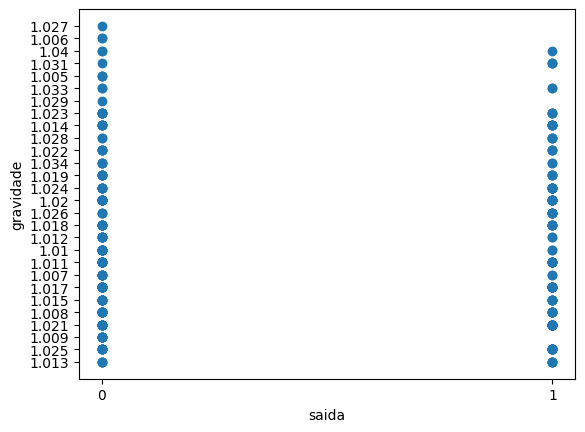

In [61]:
# Plotando um gráfico de dispersão usando os dados das colunas 'saida' (eixo 'x') e 'gravidade' (eixo 'y') do DataFrame, usando pontos ('o') como marcadores
plt.plot(dados_spark_sem_na_pd['saida'], dados_spark_sem_na_pd['gravidade'], 'o')
plt.xlabel('saida')
plt.ylabel('gravidade')
plt.show()

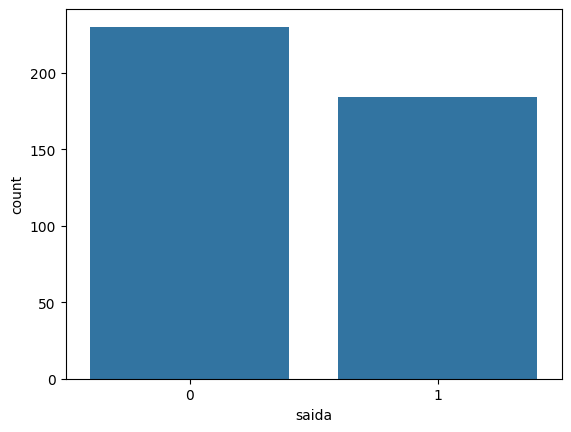

In [62]:
# Gerando um gráfico de contagem usando a biblioteca Seaborn (sns) no qual o eixo x representa os valores da coluna "saida" do DataFrame
sns.countplot(x="saida", data=dados_spark_sem_na_pd)
plt.show()

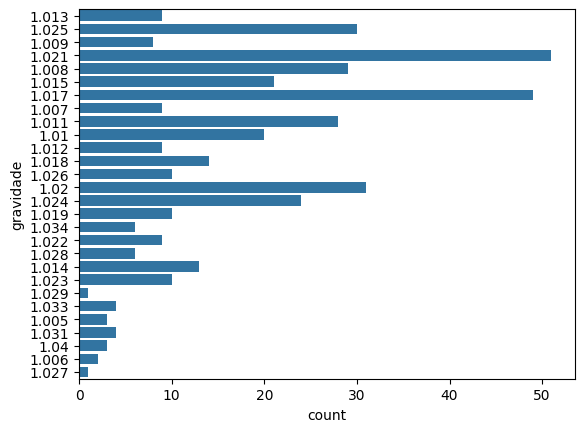

In [63]:
# Gerando um gráfico de contagem (countplot) da variável "gravidade" em relação aos dados contidos no DataFrame usando a biblioteca Seaborn (sns).
sns.countplot(y="gravidade", data=dados_spark_sem_na_pd)
plt.show(5)

In [64]:
# Importando a classe SparkSession do módulo sql do pacote pyspark.
from pyspark.sql import SparkSession

In [65]:
# Importando classes específicas do pacote pyspark.ml para uso posterior
from pyspark.ml.classification import DecisionTreeClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

In [66]:
# Criando uma sessão Spark chamada "ClassificationEvaluation" e a atribui à variável spark, caso ela ainda não exista.
spark = SparkSession.builder.appName("ClassificationEvaluation").getOrCreate()
data = [(1.013, 6.19, 443	,14.8	, 124, 1.45, 0), (1.025, 5.4,	703,	23.6,	394, 4.8, 0), (1.021, 4.91,	442, 20.8, 398, 6.3, 1), (1.021, 5.53, 874, 17.8, 385, 2.21, 1), (1.017, 5.97,	487, 15.5, 255, 12.68, 0), (1.021, 5.16, 947,	26.0, 398, 8.94, 1),(1.021,	5.94,	956, 27.6,	473, 4.45, 1)]
columns = ["gravidade","ph","osmo","cond","ureia","calcio","saida"]
df = spark.createDataFrame(data, columns)
df.show()

+---------+----+----+----+-----+------+-----+
|gravidade|  ph|osmo|cond|ureia|calcio|saida|
+---------+----+----+----+-----+------+-----+
|    1.013|6.19| 443|14.8|  124|  1.45|    0|
|    1.025| 5.4| 703|23.6|  394|   4.8|    0|
|    1.021|4.91| 442|20.8|  398|   6.3|    1|
|    1.021|5.53| 874|17.8|  385|  2.21|    1|
|    1.017|5.97| 487|15.5|  255| 12.68|    0|
|    1.021|5.16| 947|26.0|  398|  8.94|    1|
|    1.021|5.94| 956|27.6|  473|  4.45|    1|
+---------+----+----+----+-----+------+-----+



In [67]:
# Utilizando o VectorAssembler para combinar várias colunas de entrada em uma única coluna de saída chamada "features"
# E então transformando o DataFrame df com esse assembler, resultando no DataFrame data
assembler = VectorAssembler(inputCols=["gravidade","ph","osmo","cond","ureia","calcio" ], outputCol="features")
data = assembler.transform(df)
data.show()

+---------+----+----+----+-----+------+-----+--------------------+
|gravidade|  ph|osmo|cond|ureia|calcio|saida|            features|
+---------+----+----+----+-----+------+-----+--------------------+
|    1.013|6.19| 443|14.8|  124|  1.45|    0|[1.013,6.19,443.0...|
|    1.025| 5.4| 703|23.6|  394|   4.8|    0|[1.025,5.4,703.0,...|
|    1.021|4.91| 442|20.8|  398|   6.3|    1|[1.021,4.91,442.0...|
|    1.021|5.53| 874|17.8|  385|  2.21|    1|[1.021,5.53,874.0...|
|    1.017|5.97| 487|15.5|  255| 12.68|    0|[1.017,5.97,487.0...|
|    1.021|5.16| 947|26.0|  398|  8.94|    1|[1.021,5.16,947.0...|
|    1.021|5.94| 956|27.6|  473|  4.45|    1|[1.021,5.94,956.0...|
+---------+----+----+----+-----+------+-----+--------------------+



In [68]:
# Fazendo a divisão dos dados em conjuntos de treino e teste, com 80% dos dados para treino e 20% para teste
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)
dt = DecisionTreeClassifier(featuresCol="features", labelCol="saida")

In [69]:
# Criando um avaliador de classificação multiclasse
evaluator = MulticlassClassificationEvaluator(labelCol="saida", predictionCol="prediction", metricName="accuracy")
model = nb.fit(train_data)
predictions = model.transform(test_data)
accuracy = evaluator.evaluate(predictions)
print("Acurácia do Modelo:", accuracy)

Acurácia do Modelo: 0.5


In [70]:
# Ajustando um modelo de árvore de decisão aos dados de treinamento e, em seguida, usando esse modelo para fazer previsões nos dados de teste
model1 = dt.fit(train_data)
predictions1 = model1.transform(test_data)
predictions1.select("gravidade","ph","osmo","cond","ureia","calcio","saida","prediction").show()

+---------+----+----+----+-----+------+-----+----------+
|gravidade|  ph|osmo|cond|ureia|calcio|saida|prediction|
+---------+----+----+----+-----+------+-----+----------+
|    1.025| 5.4| 703|23.6|  394|   4.8|    0|       1.0|
|    1.021|5.53| 874|17.8|  385|  2.21|    1|       1.0|
+---------+----+----+----+-----+------+-----+----------+



In [71]:
# Utilizando o MulticlassClassificationEvaluator para avaliar a precisão ponderada de um modelo de classificação multiclasse usando as previsões em relação aos rótulos reais.
evaluatorPrecisao = MulticlassClassificationEvaluator(labelCol="saida", predictionCol="prediction", metricName="weightedPrecision")
precisao = evaluatorPrecisao.evaluate(predictions)
print("Precisao do Modelo Árvore de Decisão:", precisao)

Precisao do Modelo Árvore de Decisão: 0.25


In [72]:
# Importar a biblioteca necessária
from pyspark.mllib.evaluation import MulticlassMetrics

# Converter as previsões para o formato necessário para o MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "saida").rdd.map(lambda p: (float(p[0]), float(p[1])))

# Criar um objeto MulticlassMetrics
metrics = MulticlassMetrics(predictionAndLabels)

# Calcular a matriz de confusão
confusion_matrix = metrics.confusionMatrix().toArray()

# Calcular as métricas para a classe 0
precision_0 = metrics.precision(0)
recall_0 = metrics.recall(0)
f1_0 = metrics.fMeasure(0.0)

# Calcular as métricas para a classe 1
precision_1 = metrics.precision(1)
recall_1 = metrics.recall(1)
f1_1 = metrics.fMeasure(1.0)

# Imprimir as métricas
print("Classe 0: precisão = {}, recall = {}, F1 = {}".format(precision_0, recall_0, f1_0))
print("Classe 1: precisão = {}, recall = {}, F1 = {}".format(precision_1, recall_1, f1_1))
spark.stop()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Classe 0: precisão = 0.0, recall = 0.0, F1 = 0.0
Classe 1: precisão = 0.5, recall = 1.0, F1 = 0.6666666666666666


Com base nas analises preditivas:

**Qual classe o modelo mais acertou?**

o modelo não acertou nenhuma das instâncias da classe 0 (precisão = 0.0, recall = 0.0, F1 = 0.0).

O modelo parece ter acertado todas as instâncias da classe 1 (precisão = 0.5, recall = 1.0, F1 = 0.6666666666666666).

**Para qual classe o moddelo teve mais precisão?**

A precisão é maior para a classe 1.

**Qual foi a acurácia do modelo?**

A acurácia geral do modelo não foi fornecida, mas com base nas métricas fornecidas, parece que o modelo tem uma acurácia maior para a classe 1.

**Você implementaria o modelo no sistema de detecção de cálculo renal, com base nos resultados?**

###Com base nos resultados acima, o modelo tem um desempenho melhor na previsão da classe 1. No entanto, o desempenho na classe 0 é muito pobre. Isso pode ser um problema se ambas as classes forem importantes para a detecção de cálculo renal. Portanto, pode ser necessário ajustar o modelo ou experimentar um algoritmo de classificação diferente para melhorar o desempenho na classe 0. Além disso, seria útil avaliar outras métricas (como AUC-ROC) e considerar o custo de falsos positivos e falsos negativos ao escolher um modelo para implementação.
